In [8]:
import pandas as pd
from river import compose
from river import linear_model
from river import metrics
from river import preprocessing
from river import stream
from sklearn.feature_selection import SelectKBest, f_regression
import matplotlib.pyplot as plt
import numpy as np
from river import evaluate
from river import optim
import datetime as dt

In [9]:
# Load the data
df = pd.read_csv('residential4_grid_import_export_weather_fixed_timestamps.csv')


# Convert the 'utc_timestamp' column to datetime
df['utc_timestamp'] = pd.to_datetime(df['utc_timestamp'])

#get the diffrerence of the columns to get the consumption
df['DE_KN_residential4_grid_import'] = df['DE_KN_residential4_grid_import'].diff()
df['DE_KN_residential4_grid_export'] = df['DE_KN_residential4_grid_export'].diff()

#Update the column names
df.rename(columns={'DE_KN_residential4_grid_import': 'consumption', 'DE_KN_residential4_grid_export': 'production'}, inplace=True)


# Drop the first row
df = df.dropna()

df['day_of_week'] = df['utc_timestamp'].dt.dayofweek
df['hour_of_day'] = df['utc_timestamp'].dt.hour
df['month'] = df['utc_timestamp'].dt.month

df

utc_timestamp  consumption  production    temp  holiday  \
1     2015-10-10 16:45:00     0.039682         0.0  10.450        0   
2     2015-10-10 17:00:00     0.030990         0.0  10.200        0   
3     2015-10-10 17:15:00     0.075048         0.0  10.075        0   
4     2015-10-10 17:30:00     0.175761         0.0   9.950        0   
5     2015-10-10 17:45:00     0.541081         0.0   9.825        0   
...                   ...          ...         ...     ...      ...   
81430 2018-02-04 22:00:00     0.295898         0.0   0.400        0   
81431 2018-02-04 22:15:00     0.279297         0.0   0.350        0   
81432 2018-02-04 22:30:00     0.145508         0.0   0.300        0   
81433 2018-02-04 22:45:00     0.219727         0.0   0.250        0   
81434 2018-02-04 23:00:00     0.209961         0.0   0.200        0   

       season_Autumn  season_Spring  season_Summer  season_Winter  \
1                  1              0              0              0   
2                  1              0              0              0   
3                  1              0              0              0   
4                  1              0              0              0   
5                  1              0              0              0   
...              ...            ...            ...            ...   
81430              0              0              0              1   
81431              0              0              0              1   
81432              0              0              0              1   
81433              0              0              0              1   
81434              0              0              0              1   

       day_of_week_Friday  day_of_week_Monday  day_of_week_Saturday  \
1                       0                   0                     1   
2                       0                   0                     1   
3                       0                   0                     1   
4                       0                   0                     1   
5                       0                   0                     1   
...                   ...                 ...                   ...   
81430                   0                   0                     0   
81431                   0                   0                     0   
81432                   0                   0                     0   
81433                   0                   0                     0   
81434                   0                   0                     0   

       day_of_week_Sunday  day_of_week_Thursday  day_of_week_Tuesday  \
1                       0                     0                    0   
2                       0                     0                    0   
3                       0                     0                    0   
4                       0                     0                    0   
5                       0                     0                    0   
...                   ...                   ...                  ...   
81430                   1                     0                    0   
81431                   1                     0                    0   
81432                   1                     0                    0   
81433                   1                     0                    0   
81434                   1                     0                    0   

       day_of_week_Wednesday  day_of_week  hour_of_day  month  
1                          0            5           16     10  
2                          0            5           17     10  
3                          0            5           17     10  
4                          0            5           17     10  
5                          0            5           17     10  
...                      ...          ...          ...    ...  
81430                      0            6           22      2  
81431                      0            6           22      2  
81432                      0        

({'utc_timestamp': Timestamp('2015-10-10 16:45:00'), 'production': 0.0, 'temp': 10.45, 'holiday': 0, 'season_Autumn': 1, 'season_Spring': 0, 'season_Summer': 0, 'season_Winter': 0, 'day_of_week_Friday': 0, 'day_of_week_Monday': 0, 'day_of_week_Saturday': 1, 'day_of_week_Sunday': 0, 'day_of_week_Thursday': 0, 'day_of_week_Tuesday': 0, 'day_of_week_Wednesday': 0, 'day_of_week': 5, 'hour_of_day': 16, 'month': 10}, 0.0396815708706)


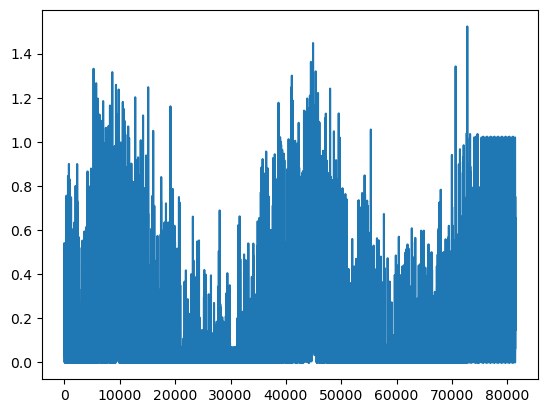

In [10]:
df['consumption'].plot()

#drop the utc_timestamp column
#df = df.drop('utc_timestamp', axis=1)

stream = iter(df.itertuples(index=False))
stream = iter([(x._asdict(), y) for x, y in zip(df.drop('consumption', axis=1).itertuples(index=False), df['consumption'])])
print(next(stream))

{}
0.0
LinearRegression
{'MAE': MAE: 0.03099, 'Step': 1, 'Prediction': 0.0}
{'MAE': MAE: 0.053019, 'Step': 2, 'Prediction': 0.0}
{'MAE': MAE: 0.093933, 'Step': 3, 'Prediction': 0.0}
{'MAE': MAE: 0.20572, 'Step': 4, 'Prediction': 0.0}
{'MAE': MAE: 0.252502, 'Step': 5, 'Prediction': 0.0}
{'MAE': MAE: 0.238342, 'Step': 6, 'Prediction': 0.0}
{'MAE': MAE: 0.213356, 'Step': 7, 'Prediction': 0.0}
{'MAE': MAE: 0.197191, 'Step': 8, 'Prediction': 0.0}
{'MAE': MAE: 0.184806, 'Step': 9, 'Prediction': 0.0}
{'MAE': MAE: 0.175138, 'Step': 10, 'Prediction': 0.0}
{'MAE': MAE: 0.165685, 'Step': 11, 'Prediction': 0.0}
{'MAE': MAE: 0.161046, 'Step': 12, 'Prediction': 0.0}
{'MAE': MAE: 0.155744, 'Step': 13, 'Prediction': 0.0}
{'MAE': MAE: 0.150126, 'Step': 14, 'Prediction': 0.0}
{'MAE': MAE: 0.144369, 'Step': 15, 'Prediction': 0.0}
{'MAE': MAE: 0.141251, 'Step': 16, 'Prediction': 0.0}
{'MAE': MAE: 0.136475, 'Step': 17, 'Prediction': 0.0}
{'MAE': MAE: 0.131583, 'Step': 18, 'Prediction': 0.0}
{'MAE': MAE: 0.

C:\Users\stijn\AppData\Local\Temp\ipykernel_28864\3914677175.py:51: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  ax.plot_date(mdates.date2num(timestamps), predictions, linestyle='-', marker=None)


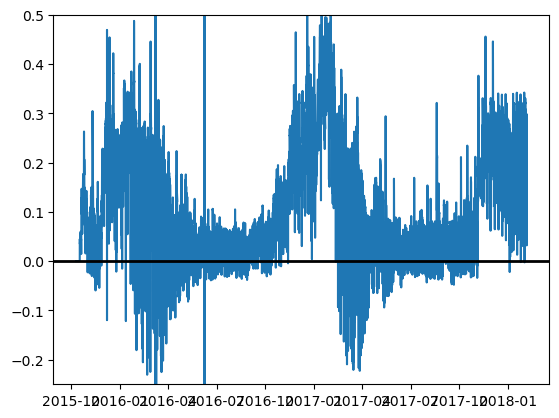

C:\Users\stijn\AppData\Local\Temp\ipykernel_28864\3914677175.py:63: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  ax.plot_date(mdates.date2num(timestamps), Mea_overtime, linestyle='-', marker=None)


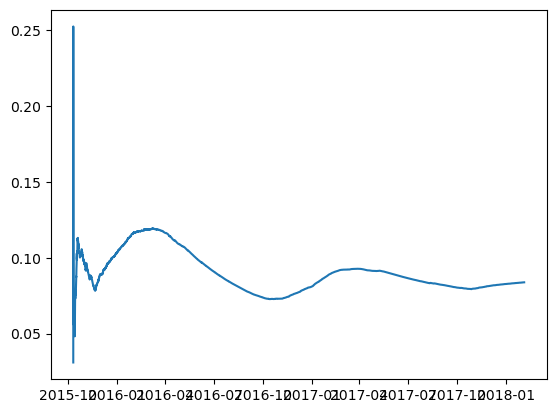

['day_of_week', 'holiday', 'hour_of_day', 'month', 'production', 'season_Autumn', 'season_Spring', 'season_Summer', 'season_Winter', 'temp'] | StandardScaler | LinearRegression
The predicted consumption is:
-0.03569124607454338


In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates



model = compose.Select('production', 'temp', 'holiday', 'season_Autumn', 'season_Spring', 'season_Summer', 'season_Winter', 'hour_of_day', 'month', 'day_of_week')
model |= preprocessing.StandardScaler()
#check for negative values after scaling

model |= linear_model.LinearRegression(optimizer=optim.SGD(0.000241))

metric = metrics.MAE()

steps = evaluate.iter_progressive_val_score(
    dataset=stream,
    model=model,
    metric=metrics.MAE(),
    moment='utc_timestamp',
    delay=dt.timedelta(days=7),
    step=1,
    yield_predictions=True,
)
print(model['LinearRegression'].weights)
print(model['LinearRegression'].intercept)
print(model['LinearRegression'])
start_date =  df['utc_timestamp'].min()
end_date =  df['utc_timestamp'].max()   
# Initialize lists to store the predictions and their timestamps
predictions = []
timestamps = pd.date_range(start=start_date, end=end_date, freq='15min')
#remove the first timestamp
timestamps = timestamps[1:]
Mea_overtime = []

length = 0
for step in steps:
    print(step)
    length += 1
    predictions.append(step["Prediction"])
    #print(step["MAE"])
    Mea_overtime.append(str(step["MAE"]).split(" ")[1])
    #print(model['LinearRegression'].weights)
    #print(model['LinearRegression'].intercept)
    
#convert list of strings to list of floats
Mea_overtime = [float(i) for i in Mea_overtime]

# Plot the predictions
fig, ax = plt.subplots()
ax.plot_date(mdates.date2num(timestamps), predictions, linestyle='-', marker=None)
#draw x-axis line
ax.axhline(0, color='black', lw=2)

# Format the x-axis to display dates
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax.set_ylim(-0.25,0.5)

plt.show()

# Plot the MAE
fig, ax = plt.subplots()
ax.plot_date(mdates.date2num(timestamps), Mea_overtime, linestyle='-', marker=None)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
#ax.set_ylim(-0.25,0.5)
plt.show()



new_data = {'production': 1.0, 'temp': 20.0, 'holiday': 0, 'season_Autumn': 0, 'season_Spring': 1, 'season_Summer': 0, 'season_Winter': 0, 'hour_of_day': 12, 'month': 4, 'day_of_week': 2}
print(model)
# Make a prediction on the new data
prediction = model.predict_one(new_data)
print("The predicted consumption is:")
print(prediction)



In [12]:

#2018-02-04 22:45:00,10246.8760149   ,19070.7497393,0.25,0,0,0,0,1,0,0,0,1,0,0,0
#2018-02-04 23:00:00,10247.0859759    ,19070.7497393,0.2,0,0,0,0,1,0,0,0,1,0,0,0

print(model['LinearRegression'].weights)
print(model['LinearRegression'].intercept)

{"production": 0.2099, "temp": 0.2, "holiday": 0, "season_Autumn": 0, "season_Spring": 0, "season_Summer": 0, "season_Winter": 1, "hour_of_day": 4, "month": 2, "day_of_week": 2}

new_data = {"production": 0.2099, "temp": 0.2, "holiday": 0, "season_Autumn": 0, "season_Spring": 0, "season_Summer": 0, "season_Winter": 1, "hour_of_day": 4, "month": 2, "day_of_week": 2}
print(model)
# Make a prediction on the new data
prediction = model.predict_one(new_data)
print("The predicted consumption is:")
print(prediction)

{'holiday': 0.0, 'season_Summer': -0.006456915680023658, 'season_Autumn': 0.008970947220543046, 'production': -0.10628797092562195, 'month': 0.01516976375877687, 'season_Spring': -0.013340470992949847, 'temp': -0.004742412937353104, 'day_of_week': 0.0009236287555105133, 'hour_of_day': 0.023078275487216436, 'season_Winter': 0.006407563618733392}
0.18876670639457685
['day_of_week', 'holiday', 'hour_of_day', 'month', 'production', 'season_Autumn', 'season_Spring', 'season_Summer', 'season_Winter', 'temp'] | StandardScaler | LinearRegression
The predicted consumption is:
0.17172754599033557


In [13]:
from river import optim
from river import evaluate
from sklearn.model_selection import ParameterGrid
stream = iter(df.itertuples(index=False))
stream = iter([(x._asdict(), y) for x, y in zip(df.drop('consumption', axis=1).itertuples(index=False), df['consumption'])])
# Define the parameter grid
param_grid = {'learning_rate': [0.00026, 0.00025, 0.00024, 0.000241, 0.00032, 0.000239, 0.00028]}

# Initialize the best MAE and learning rate
best_mae = float('inf')
best_lr = None


def get_maetest(mae):
    return float(str(mae).split(" ")[1])



# Iterate over the parameter grid
for params in ParameterGrid(param_grid):
    # Create a new model with the current learning rate
    model = compose.Select('production', 'temp', 'holiday', 'season_Autumn', 'season_Spring', 'season_Summer', 'season_Winter', 'hour_of_day', 'month', 'day_of_week')
    model |= preprocessing.StandardScaler()
    model |= linear_model.LinearRegression(optimizer=optim.SGD(params['learning_rate']))
    
    # Evaluate the model
    mae = evaluate.progressive_val_score(
        dataset=stream,
        model=model.clone(),
        metric=metrics.MAE(),
        moment='utc_timestamp',
        delay=dt.timedelta(days=7),
        step=1,
    )
    print(mae)
    #print(type(mae.get()))
    stream = iter(df.itertuples(index=False))
    stream = iter([(x._asdict(), y) for x, y in zip(df.drop('consumption', axis=1).itertuples(index=False), df['consumption'])])
    #print(type(best_mae))
    
    #print(float(str(mae).split(" ")[1]))
    # If the current MAE is better than the best MAE, update the best MAE and learning rate
    #print(f'Learning rate: {params["learning_rate"]}, MAE: {(mae)}')
    if mae.get() != 0 and mae.get() < best_mae:
        best_mae = mae.get()
        best_lr = params['learning_rate']

print(f'Best MAE: {best_mae}')
print(f'Best learning rate: {best_lr}')

MAE: 0.083851
MAE: 0.083835
MAE: 0.083831
MAE: 0.083831
MAE: 0.084537
MAE: 0.083831
MAE: 0.083938
Best MAE: 0.08383092548725306
Best learning rate: 0.000241


({'utc_timestamp': Timestamp('2015-10-10 16:45:00'), 'production': 0.0, 'temp': 10.45, 'holiday': 0, 'season_Autumn': 1, 'season_Spring': 0, 'season_Summer': 0, 'season_Winter': 0, 'day_of_week_Friday': 0, 'day_of_week_Monday': 0, 'day_of_week_Saturday': 1, 'day_of_week_Sunday': 0, 'day_of_week_Thursday': 0, 'day_of_week_Tuesday': 0, 'day_of_week_Wednesday': 0, 'day_of_week': 5, 'hour_of_day': 16, 'month': 10}, 0.0396815708706)
MAE: 0.0


C:\Users\stijn\AppData\Local\Temp\ipykernel_28864\940865554.py:33: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  ax.plot_date(mdates.date2num(timestamps), predictions, linestyle='-', marker=None)


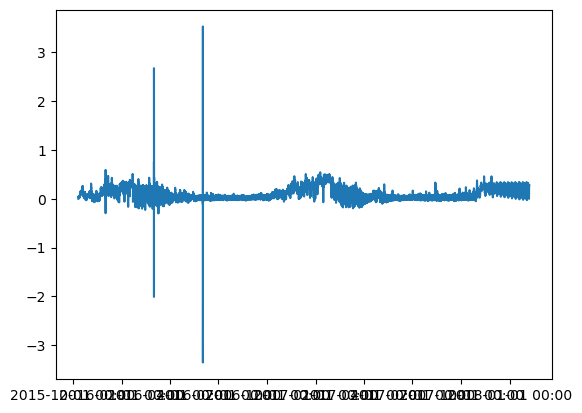

In [14]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
stream = iter(df.itertuples(index=False))
stream = iter([(x._asdict(), y) for x, y in zip(df.drop('consumption', axis=1).itertuples(index=False), df['consumption'])])
print(next(stream))



# Initialize an empty list to store the predictions and their timestamps
predictions = []
timestamps = []

# Clone the model
model_clone = model.clone()

# Iterate over the stream
for x, y in stream:
    # Make a prediction
    y_pred = model_clone.predict_one(x)
    
    # Store the prediction and the timestamp (delayed by 24 hours)
    predictions.append(y_pred)
    timestamps.append(x['utc_timestamp'] + dt.timedelta(hours=24))
    
    # Update the model
    model_clone.learn_one(x, y)

#print the metrics
print(f'MAE: {metric.get()}')

# Plot the predictions
fig, ax = plt.subplots()
ax.plot_date(mdates.date2num(timestamps), predictions, linestyle='-', marker=None)

# Format the x-axis to display dates
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))

plt.show()